In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.externals import joblib
import seaborn as sns
%matplotlib inline

Read the file

In [10]:
df = pd.read_csv('/content/drive/MyDrive/Loan_status/data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Data Exploration

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
df = df.dropna()

In [16]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


Graph Plotting 

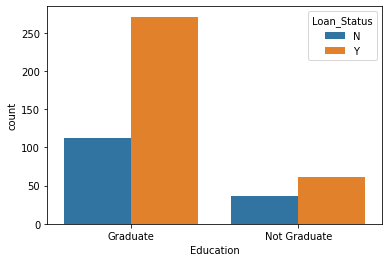

In [27]:
sns.countplot(x = 'Education',hue = 'Loan_Status',data = df)

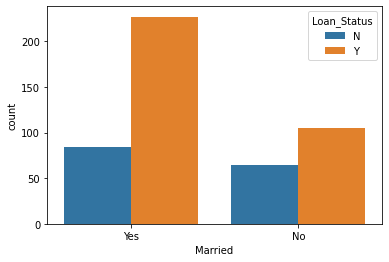

In [29]:
sns.countplot(x = 'Married',hue = 'Loan_Status',data = df)

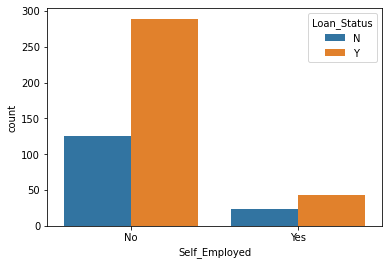

In [30]:
sns.countplot(x = 'Self_Employed',hue = 'Loan_Status',data = df)

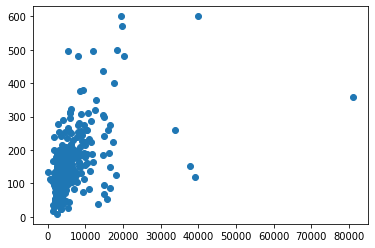

In [32]:
plt.scatter(df.ApplicantIncome,df.LoanAmount)

Categorical to numerical conversion

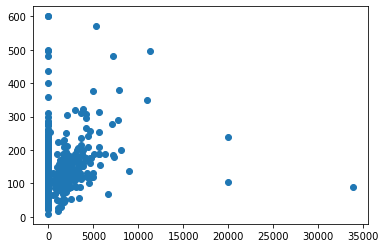

In [35]:
plt.scatter(df.CoapplicantIncome,df.LoanAmount)

In [59]:
df = df.replace({'Gender':{'Male': ' 0','Female': '1'}, 'Married':{'No': ' 0','Yes': '1'},'Education':{'Not Graduate': ' 0','Graduate': '1'}, 'Self_Employed':{'No': ' 0','Yes': '1'}, 'Property_Area':{'Urban': ' 0','Rural': '1','Semiurban':'3'},  'Loan_Status':{'N': ' 0','Y': '1'},'Dependents':{'3+': ' 4'}})

In [60]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,1,1
610,LP002979,0,1,4,1,0,4106,0.0,40.0,180.0,1.0,1,1
611,LP002983,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,0,1
612,LP002984,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,0,1


Getting X and Y attributes for training the model

In [64]:
x = df.drop(columns = ['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']

Splitting attributes into training and testing dataset

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [67]:
len(x_test)

144

Function to check best model for training the dataset

In [113]:
def check(model):
  score = 0
  for model in model:
    model.fit(x_train,y_train)
    model_name = type(model).__name__
    temp_score = model.score(x_test,y_test)
    if temp_score>score:
      score = temp_score
      model_name_best = model_name
      model_final = model
    print(model_name,temp_score)
    print('\n')
  print('The best model is : ',model_name_best,score)
  print('\n')
  return model_final

Input model Array and Getting result

In [114]:
model = [LinearRegression(),LogisticRegression(), SVC(), DecisionTreeClassifier(), Lasso(),Ridge()]
model = check(model)

LinearRegression 0.26609221121635335


LogisticRegression 0.7638888888888888


SVC 0.6944444444444444


DecisionTreeClassifier 0.7569444444444444


Lasso 0.0055968659997930326


Ridge 0.2648405276185438


The best model is :  LogisticRegression 0.7638888888888888




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [117]:
cd /content/drive/MyDrive/Loan_status

/content/drive/MyDrive/Loan_status


In [ ]:
joblib.dump(model, 'model.pkl')